In [253]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
from torch.backends import cuda, cudnn, mkl, mkldnn, mps, openmp

In [254]:
scalar = torch.tensor(3)
scalar

tensor(3)

In [255]:
scalar.shape

torch.Size([])

In [256]:
scalar.item()

3

In [257]:
scalar.ndim

0

In [258]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [259]:
vector.shape

torch.Size([2])

In [260]:
vector.ndim

1

In [261]:
# Matrix
MATRIX = torch.tensor([[7, 8], [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [262]:
MATRIX.shape

torch.Size([2, 2])

In [263]:
MATRIX.ndim

2

In [264]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3], [3, 6, 9], [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

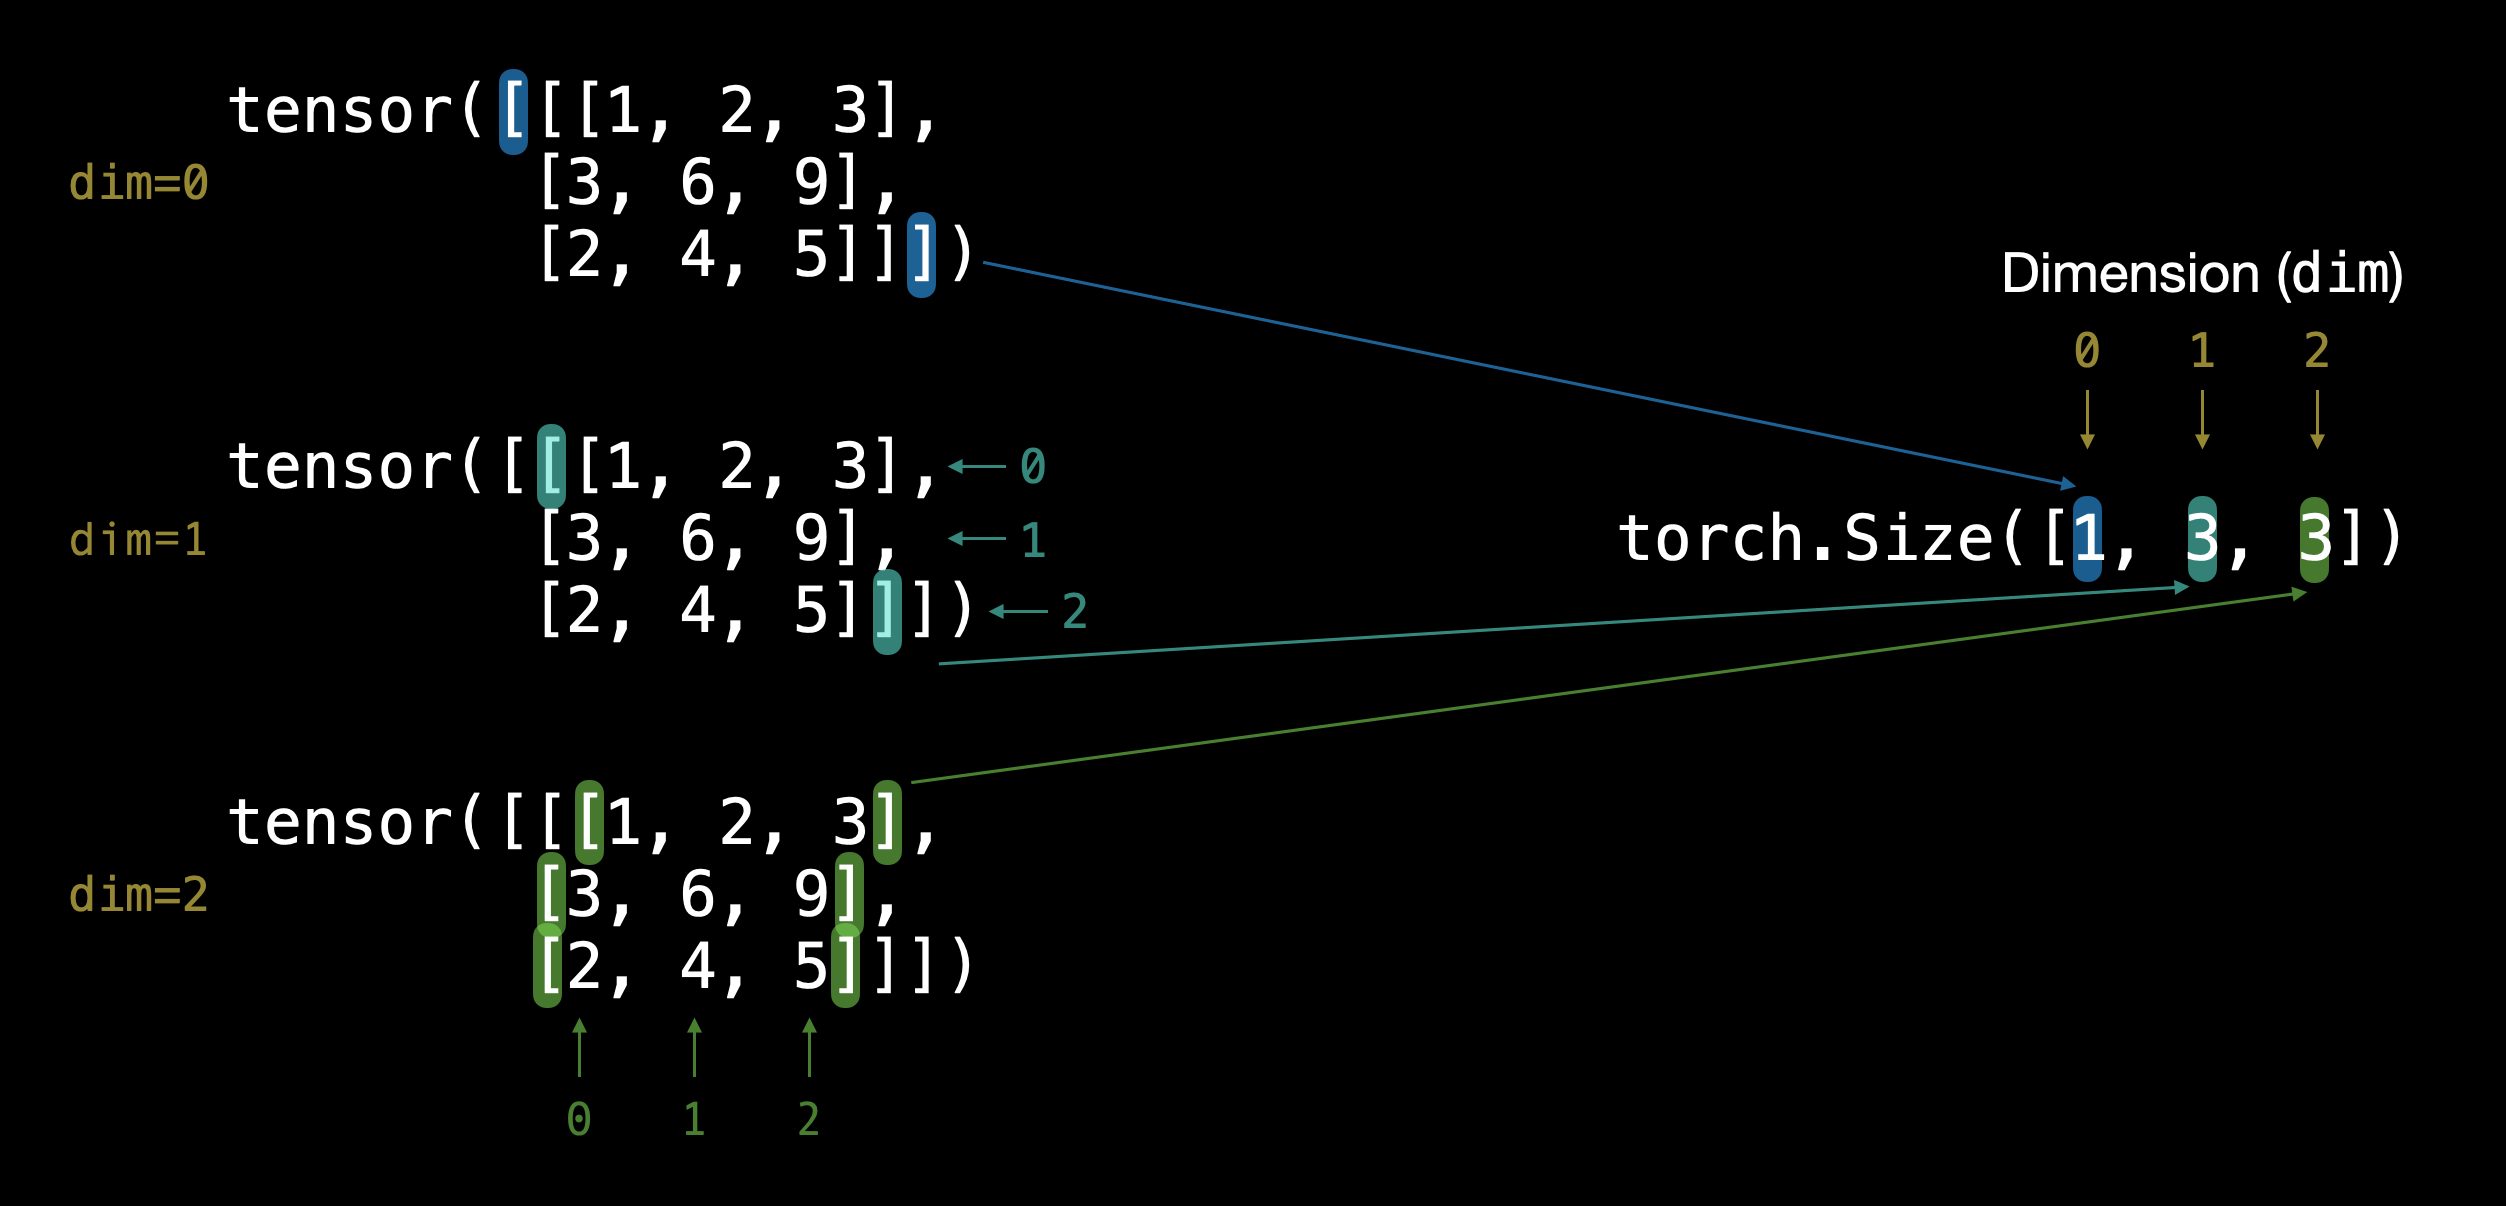


In [265]:
TENSOR.shape

torch.Size([1, 3, 3])

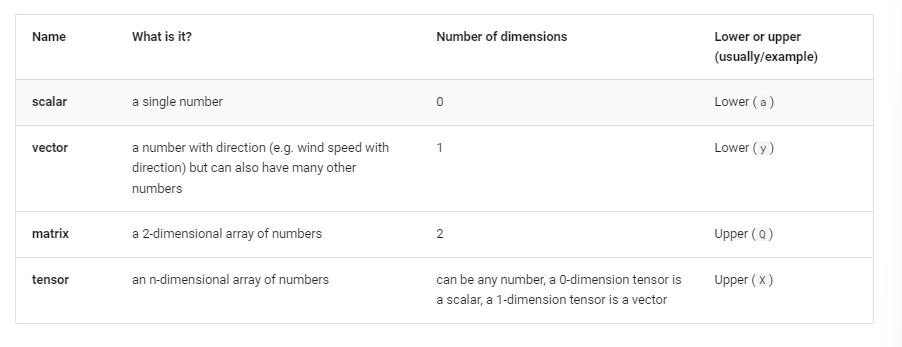


In [266]:
TENSOR.ndim

3

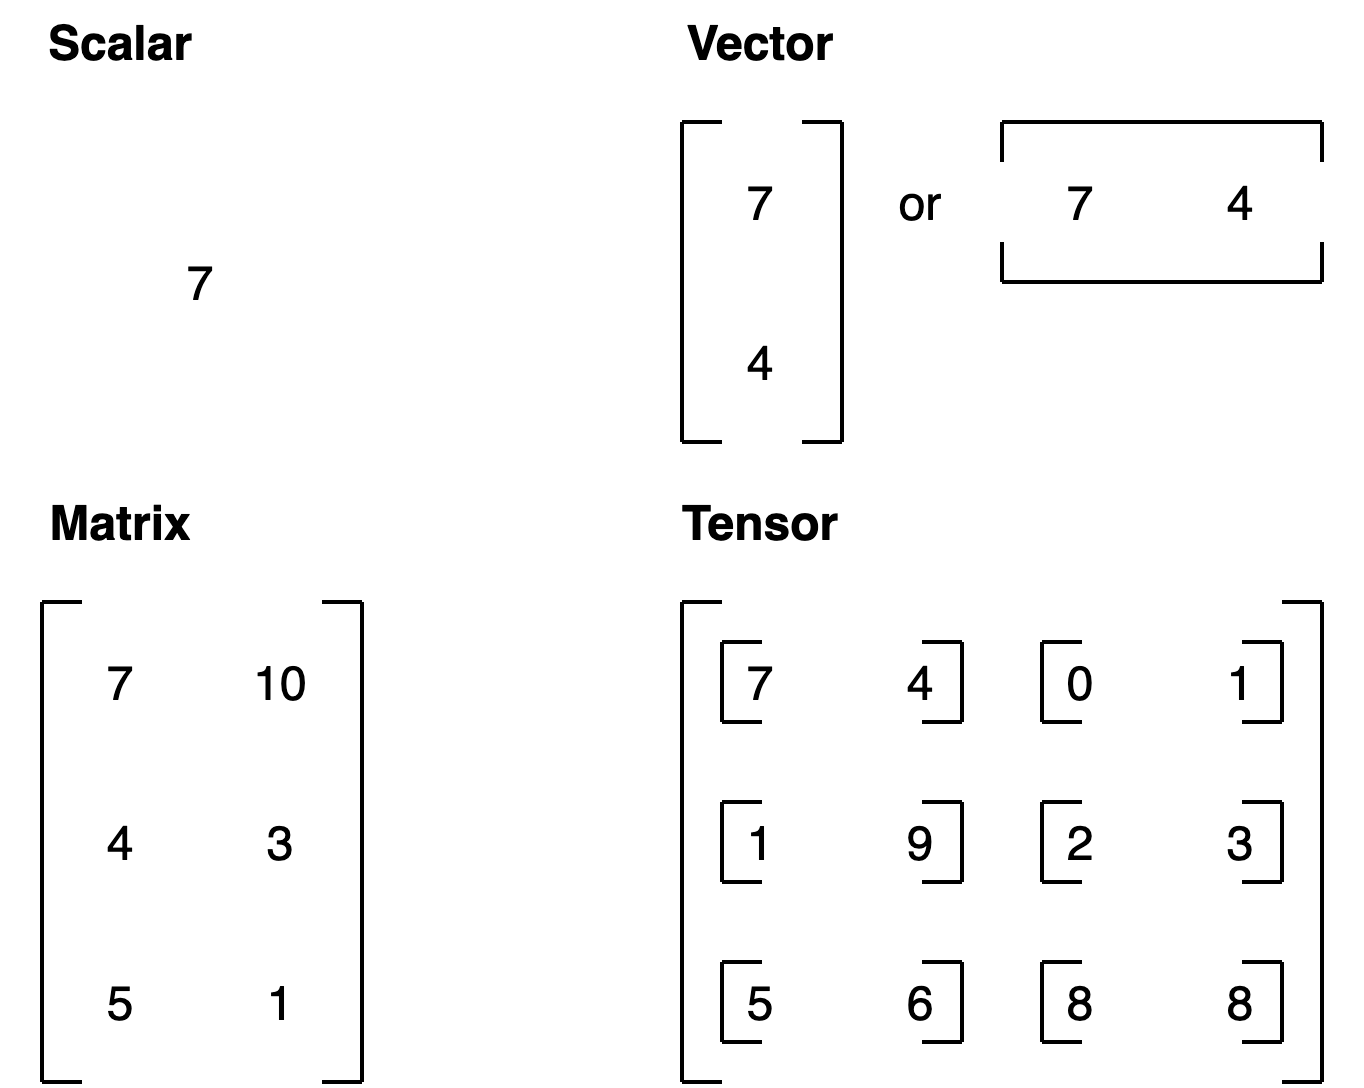


https://github.com/mrdbourke/pytorch-deep-learning


In [267]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]]),
 torch.float32)

In [268]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [269]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [270]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [271]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten)  # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [273]:
torch.cuda.is_available()

False

In [274]:
# list all available devices
torch.cuda.device_count()

0

In [275]:
# check if mps is enabled
torch.cuda.is_initialized()

False

In [276]:
print(mps.is_available())

True


In [277]:
print(mps.is_built())

True


In [278]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}")  # will default to CPU

tensor([[0.2933, 0.5889, 0.4117, 0.0992],
        [0.3078, 0.7786, 0.8016, 0.3649],
        [0.6286, 0.9663, 0.7687, 0.4566]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [279]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [280]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [281]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


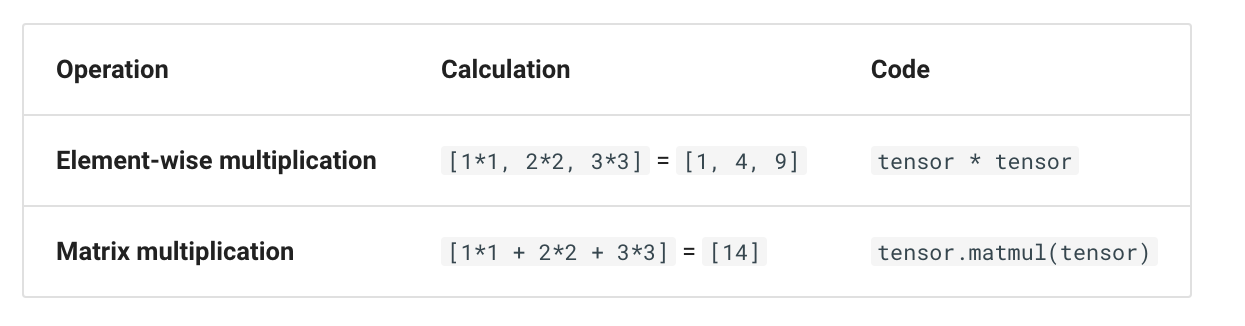


In [282]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [283]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [284]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

In [285]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10], [8, 11], [9, 12]], dtype=torch.float32)

In [286]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [287]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [288]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(
    f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n"
)
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [289]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [290]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(
    in_features=2, out_features=6  # in_features = matches inner dimension of input
)  # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [291]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [292]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}")  # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [293]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [294]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


In [295]:
# Create a tensor and check its datatype
tensor = torch.arange(10.0, 100.0, 10.0)
tensor.dtype

torch.float32

In [296]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [297]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

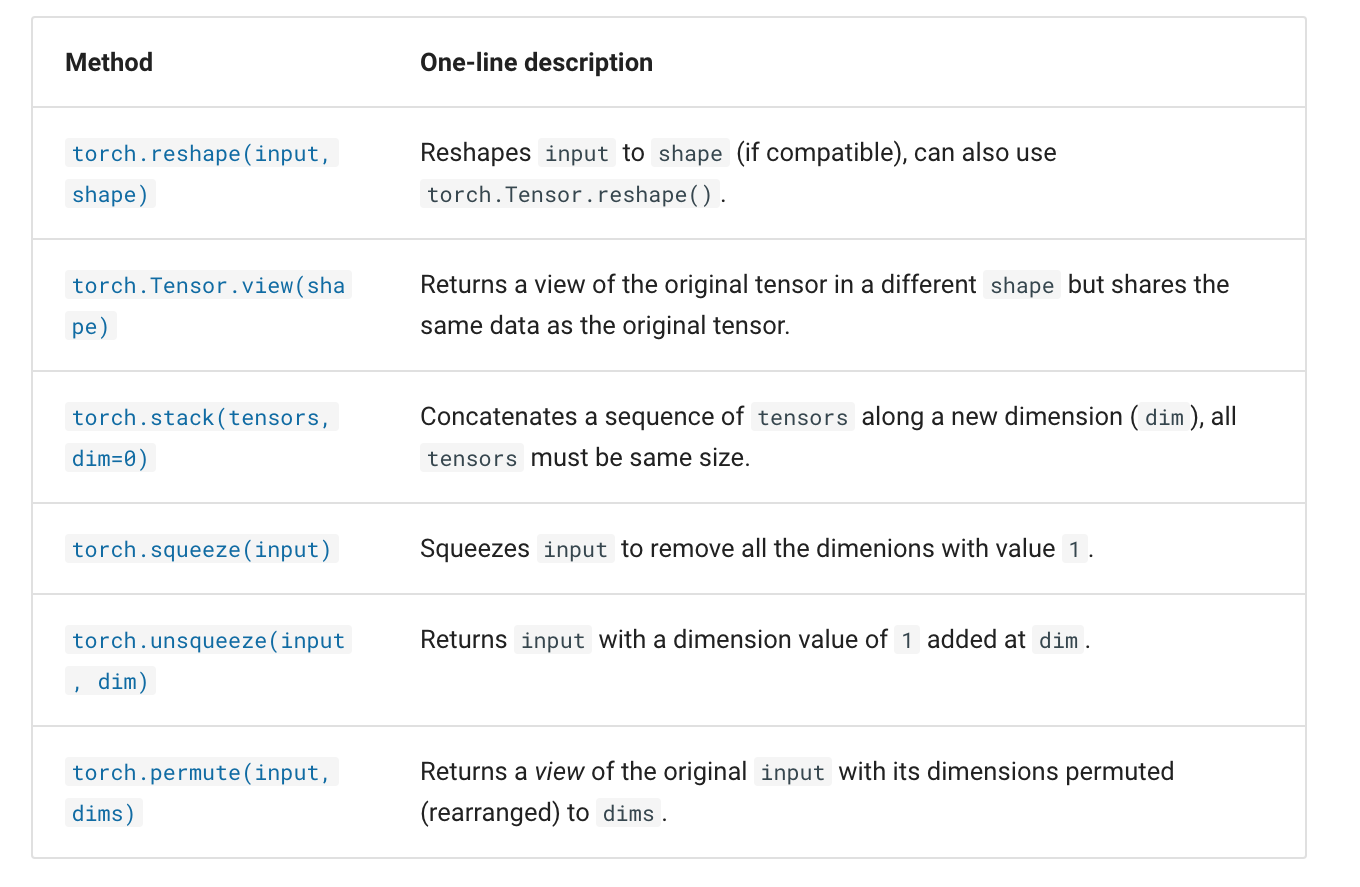


In [298]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [299]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [300]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [301]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [302]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [303]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]  # same as x[0][0]

tensor([1, 2, 3])

In [304]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [305]:
# Tensor to NumPy array
tensor = torch.ones(7)  # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy()  # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [306]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.2666, 0.6274, 0.2696, 0.4414],
        [0.2969, 0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472, 0.0062]])

Tensor B:
tensor([[0.9516, 0.0753, 0.8860, 0.5832],
        [0.3376, 0.8090, 0.5779, 0.9040],
        [0.5547, 0.3423, 0.6343, 0.3644]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [307]:
# # Set the random seed
RANDOM_SEED = 42  # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(
    seed=RANDOM_SEED
)  # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [308]:
device = torch.device("mps")
device

device(type='mps')

In [309]:
x = torch.tensor([1, 2, 3])
x.device

device(type='cpu')

In [310]:
x = torch.tensor([1, 2, 3]).to(device)
x.device

device(type='mps', index=0)

In [311]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='mps:0')

In [312]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [313]:
tensor_on_gpu

tensor([1, 2, 3], device='mps:0')

In [314]:
mps.is_macos13_or_newer()

True

CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). CUDA enables developers to speed up compute-intensive applications by harnessing the power of GPUs for the parallelizable part of the computation.

CUDA is a proprietary and closed source platform, but it is available for free to developers. It is supported on Windows, Linux, and macOS.

CUDA is used in a wide variety of applications, including:

- **High performance computing (HPC)**: CUDA is used to accelerate a wide variety of HPC applications, including climate modeling, fluid dynamics, and molecular dynamics.
- **Machine learning (ML)**: CUDA is used to accelerate ML applications, such as training and inference of deep learning models.
- **Graphics:** CUDA is used to accelerate graphics applications, such as video games and 3D rendering.
- **Scientific computing:** CUDA is used to accelerate scientific computing applications, such as computational fluid dynamics and finite element analysis.

CUDA is a powerful tool that can be used to speed up a wide variety of applications. If you are developing an application that is compute-intensive, you should consider using CUDA.

Here are some of the benefits of using CUDA:

- **Performance:** CUDA can significantly improve the performance of compute-intensive applications.
- **Portability:** CUDA is supported on a wide variety of platforms, so your applications can be deployed on a variety of hardware.
- **Ease of use:** CUDA is relatively easy to learn and use. There are many resources available to help you get started with CUDA.

If you are interested in learning more about CUDA, there are many resources available online. You can also visit the NVIDIA Developer website to download the CUDA Toolkit and learn more about CUDA programming.


In [315]:
cuda.is_built()

False

CuDNN (CUDA Deep Neural Network) is a GPU-accelerated library of primitives for deep neural networks. It provides highly tuned implementations of routines arising frequently in DNN applications, such as forward and backward convolution, pooling, normalization, and activation layers.

CuDNN is built on top of the CUDA framework, which is how you use NVIDIA GPUs for general purpose computing tasks. CuDNN is a proprietary library, but it is available for free to developers. It is supported on Windows, Linux, and macOS.

CuDNN is used by many deep learning frameworks, including TensorFlow, PyTorch, and Caffe. It can significantly improve the performance of deep learning applications, especially on large datasets.

Here are some of the benefits of using CuDNN:

- **Performance:** CuDNN can significantly improve the performance of deep learning applications.
- **Portability:** CuDNN is supported by many deep learning frameworks, so your applications can be deployed on a variety of hardware.
- **Ease of use:** CuDNN is relatively easy to use. There are many resources available to help you get started with CuDNN.

If you are interested in learning more about CuDNN, there are many resources available online. You can also visit the NVIDIA Developer website to download the CuDNN library and learn more about CuDNN programming.

Here are some of the differences between CUDA and CuDNN:

- **CUDA is a platform and programming model, while CuDNN is a library.** CUDA provides the infrastructure for developers to write code that runs on GPUs, while CuDNN provides pre-optimized implementations of common deep learning operations.
- **CUDA is open source, while CuDNN is proprietary.** CUDA is available for free to developers, while CuDNN is licensed to developers.
- **CUDA is used for a wider variety of applications, while CuDNN is specifically designed for deep learning.** CUDA can be used to accelerate a wide variety of applications, including HPC, graphics, and scientific computing. CuDNN is specifically designed to accelerate deep learning applications.

If you are developing a deep learning application, you should consider using CuDNN. CuDNN can significantly improve the performance of your application, and it is relatively easy to use.


In [316]:
cudnn.is_available()

False

MKL stands for Math Kernel Library. It is a library of optimized math routines for science, engineering, and financial applications. MKL provides highly optimized implementations of common mathematical operations, such as BLAS, LAPACK, and FFT. MKL is available for Windows, Linux, and macOS.

MKL is used by a wide variety of applications, including:

- **Scientific computing:** MKL is used to accelerate scientific computing applications, such as computational fluid dynamics and finite element analysis.
- **Machine learning:** MKL is used to accelerate machine learning applications, such as training and inference of deep learning models.
- **Graphics:** MKL is used to accelerate graphics applications, such as video games and 3D rendering.
- **High performance computing:** MKL is used to accelerate high performance computing applications, such as climate modeling and weather forecasting.

MKL can significantly improve the performance of applications that use a lot of math. If you are developing an application that uses a lot of math, you should consider using MKL.

Here are some of the benefits of using MKL:

- **Performance:** MKL can significantly improve the performance of applications that use a lot of math.
- **Portability:** MKL is available for Windows, Linux, and macOS.
- **Ease of use:** MKL is relatively easy to use. There are many resources available to help you get started with MKL.

If you are interested in learning more about MKL, there are many resources available online. You can also visit the Intel Developer website to download the MKL library and learn more about MKL programming.

Here are some of the differences between MKL and CuDNN:

- **MKL is a general purpose math library, while CuDNN is specifically designed for deep learning.** MKL provides optimized implementations of a wide variety of mathematical operations, while CuDNN provides optimized implementations of common deep learning operations.
- **MKL is open source, while CuDNN is proprietary.** MKL is available for free to developers, while CuDNN is licensed to developers.
- **MKL is used for a wider variety of applications, while CuDNN is specifically designed for deep learning.** MKL can be used to accelerate a wide variety of applications, including HPC, graphics, and scientific computing. CuDNN is specifically designed to accelerate deep learning applications.

If you are developing a general purpose application that uses a lot of math, you should consider using MKL. MKL can significantly improve the performance of your application, and it is relatively easy to use.


In [317]:
mkl.is_available()

False

MKLDNN (Intel Math Kernel Library for Deep Neural Networks) is an open-source performance library for deep learning (DL) applications intended for acceleration of DL frameworks on Intel architecture. MKLDNN includes highly vectorized and threaded building blocks for implementation of convolutional neural networks (CNNs) and recurrent neural networks (RNNs) with C and C++ interfaces. This project is created to help the DL community innovate on the Intel processor family.

MKLDNN is built on top of MKL, and it provides a high-level API for developers to accelerate their deep learning applications. MKLDNN can be used with a variety of deep learning frameworks, including TensorFlow, PyTorch, and Caffe.

Here are some of the benefits of using MKLDNN:

- **Performance:** MKLDNN can significantly improve the performance of deep learning applications.
- **Portability:** MKLDNN is available for Windows, Linux, and macOS.
- **Ease of use:** MKLDNN is relatively easy to use. There are many resources available to help you get started with MKLDNN.

If you are developing a deep learning application, you should consider using MKLDNN. MKLDNN can significantly improve the performance of your application, and it is relatively easy to use.

Here are some of the differences between MKLDNN and MKL:

- **MKLDNN is specifically designed for deep learning, while MKL is a general purpose math library.** MKLDNN provides optimized implementations of common deep learning operations, while MKL provides optimized implementations of a wide variety of mathematical operations.
- **MKLDNN is open source, while MKL is proprietary.** MKLDNN is available for free to developers, while MKL is licensed to developers.
- **MKLDNN is used for a narrower variety of applications, while MKL is used for a wider variety of applications.** MKLDNN is specifically designed to accelerate deep learning applications, while MKL can be used to accelerate a wide variety of applications, including HPC, graphics, and scientific computing.

If you are developing a deep learning application, you should consider using MKLDNN. MKLDNN can significantly improve the performance of your application, and it is relatively easy to use.


In [318]:
mkldnn.is_available()

False

OpenMP is an application programming interface (API) that supports multi-platform shared-memory multiprocessing programming in C, C++, and Fortran, on many platforms, instruction-set architectures and operating systems, including Solaris, AIX, FreeBSD, HP-UX, Linux, macOS, and Windows. It consists of a set of compiler directives, library routines, and environment variables that influence run-time behavior.

OpenMP is a directive-based parallel programming API, which means that the programmer marks the code that they want to be parallelized with OpenMP directives. The compiler then takes care of parallelizing the code and distributing it across the available threads.

OpenMP is a popular parallel programming API because it is easy to use and portable. It is also supported by a wide range of compilers and platforms, making it a good choice for parallelizing code that needs to be portable.

Here are some of the benefits of using OpenMP:

- **Performance:** OpenMP can significantly improve the performance of parallel code.
- **Portability:** OpenMP is supported by a wide range of compilers and platforms, making it a good choice for parallelizing code that needs to be portable.
- **Ease of use:** OpenMP is relatively easy to use. There are many resources available to help you get started with OpenMP.

If you are developing a parallel application, you should consider using OpenMP. OpenMP can significantly improve the performance of your application, and it is relatively easy to use.

Here are some of the limitations of OpenMP:

- **OpenMP is not as powerful as some other parallel programming APIs, such as MPI.** MPI is a more powerful parallel programming API, but it is also more complex to use.
- **OpenMP is not as scalable as some other parallel programming APIs, such as CUDA.** CUDA is a more scalable parallel programming API, but it is also more complex to use and is only available for NVIDIA GPUs.

If you are developing a parallel application that needs to be very high performance or scalable, you may want to consider using a different parallel programming API. However, if you are developing a parallel application that needs to be easy to use and portable, OpenMP is a good choice.


In [319]:
openmp.is_available()

False

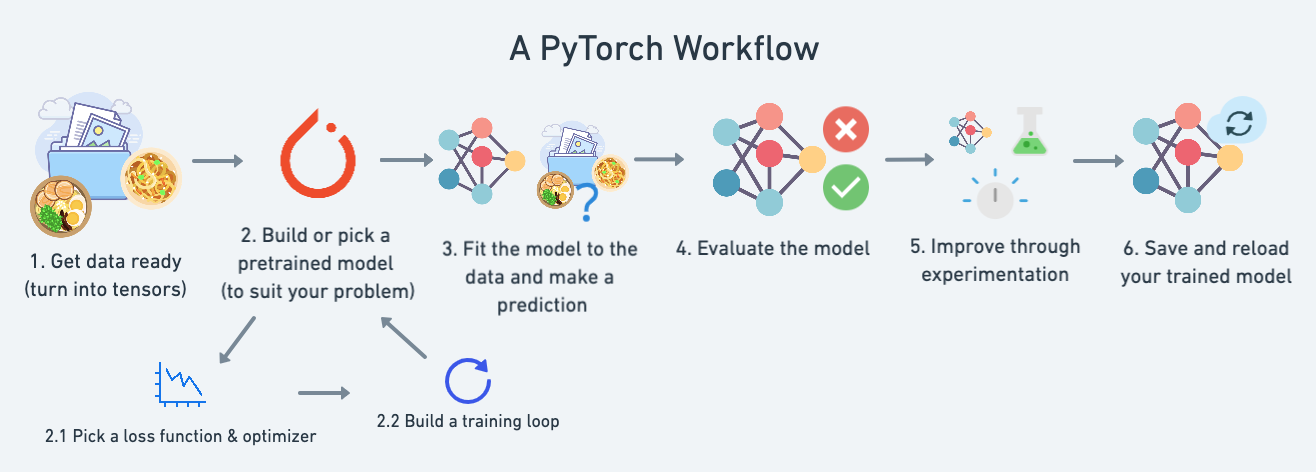


In [320]:
torch.__version__

'2.0.1'

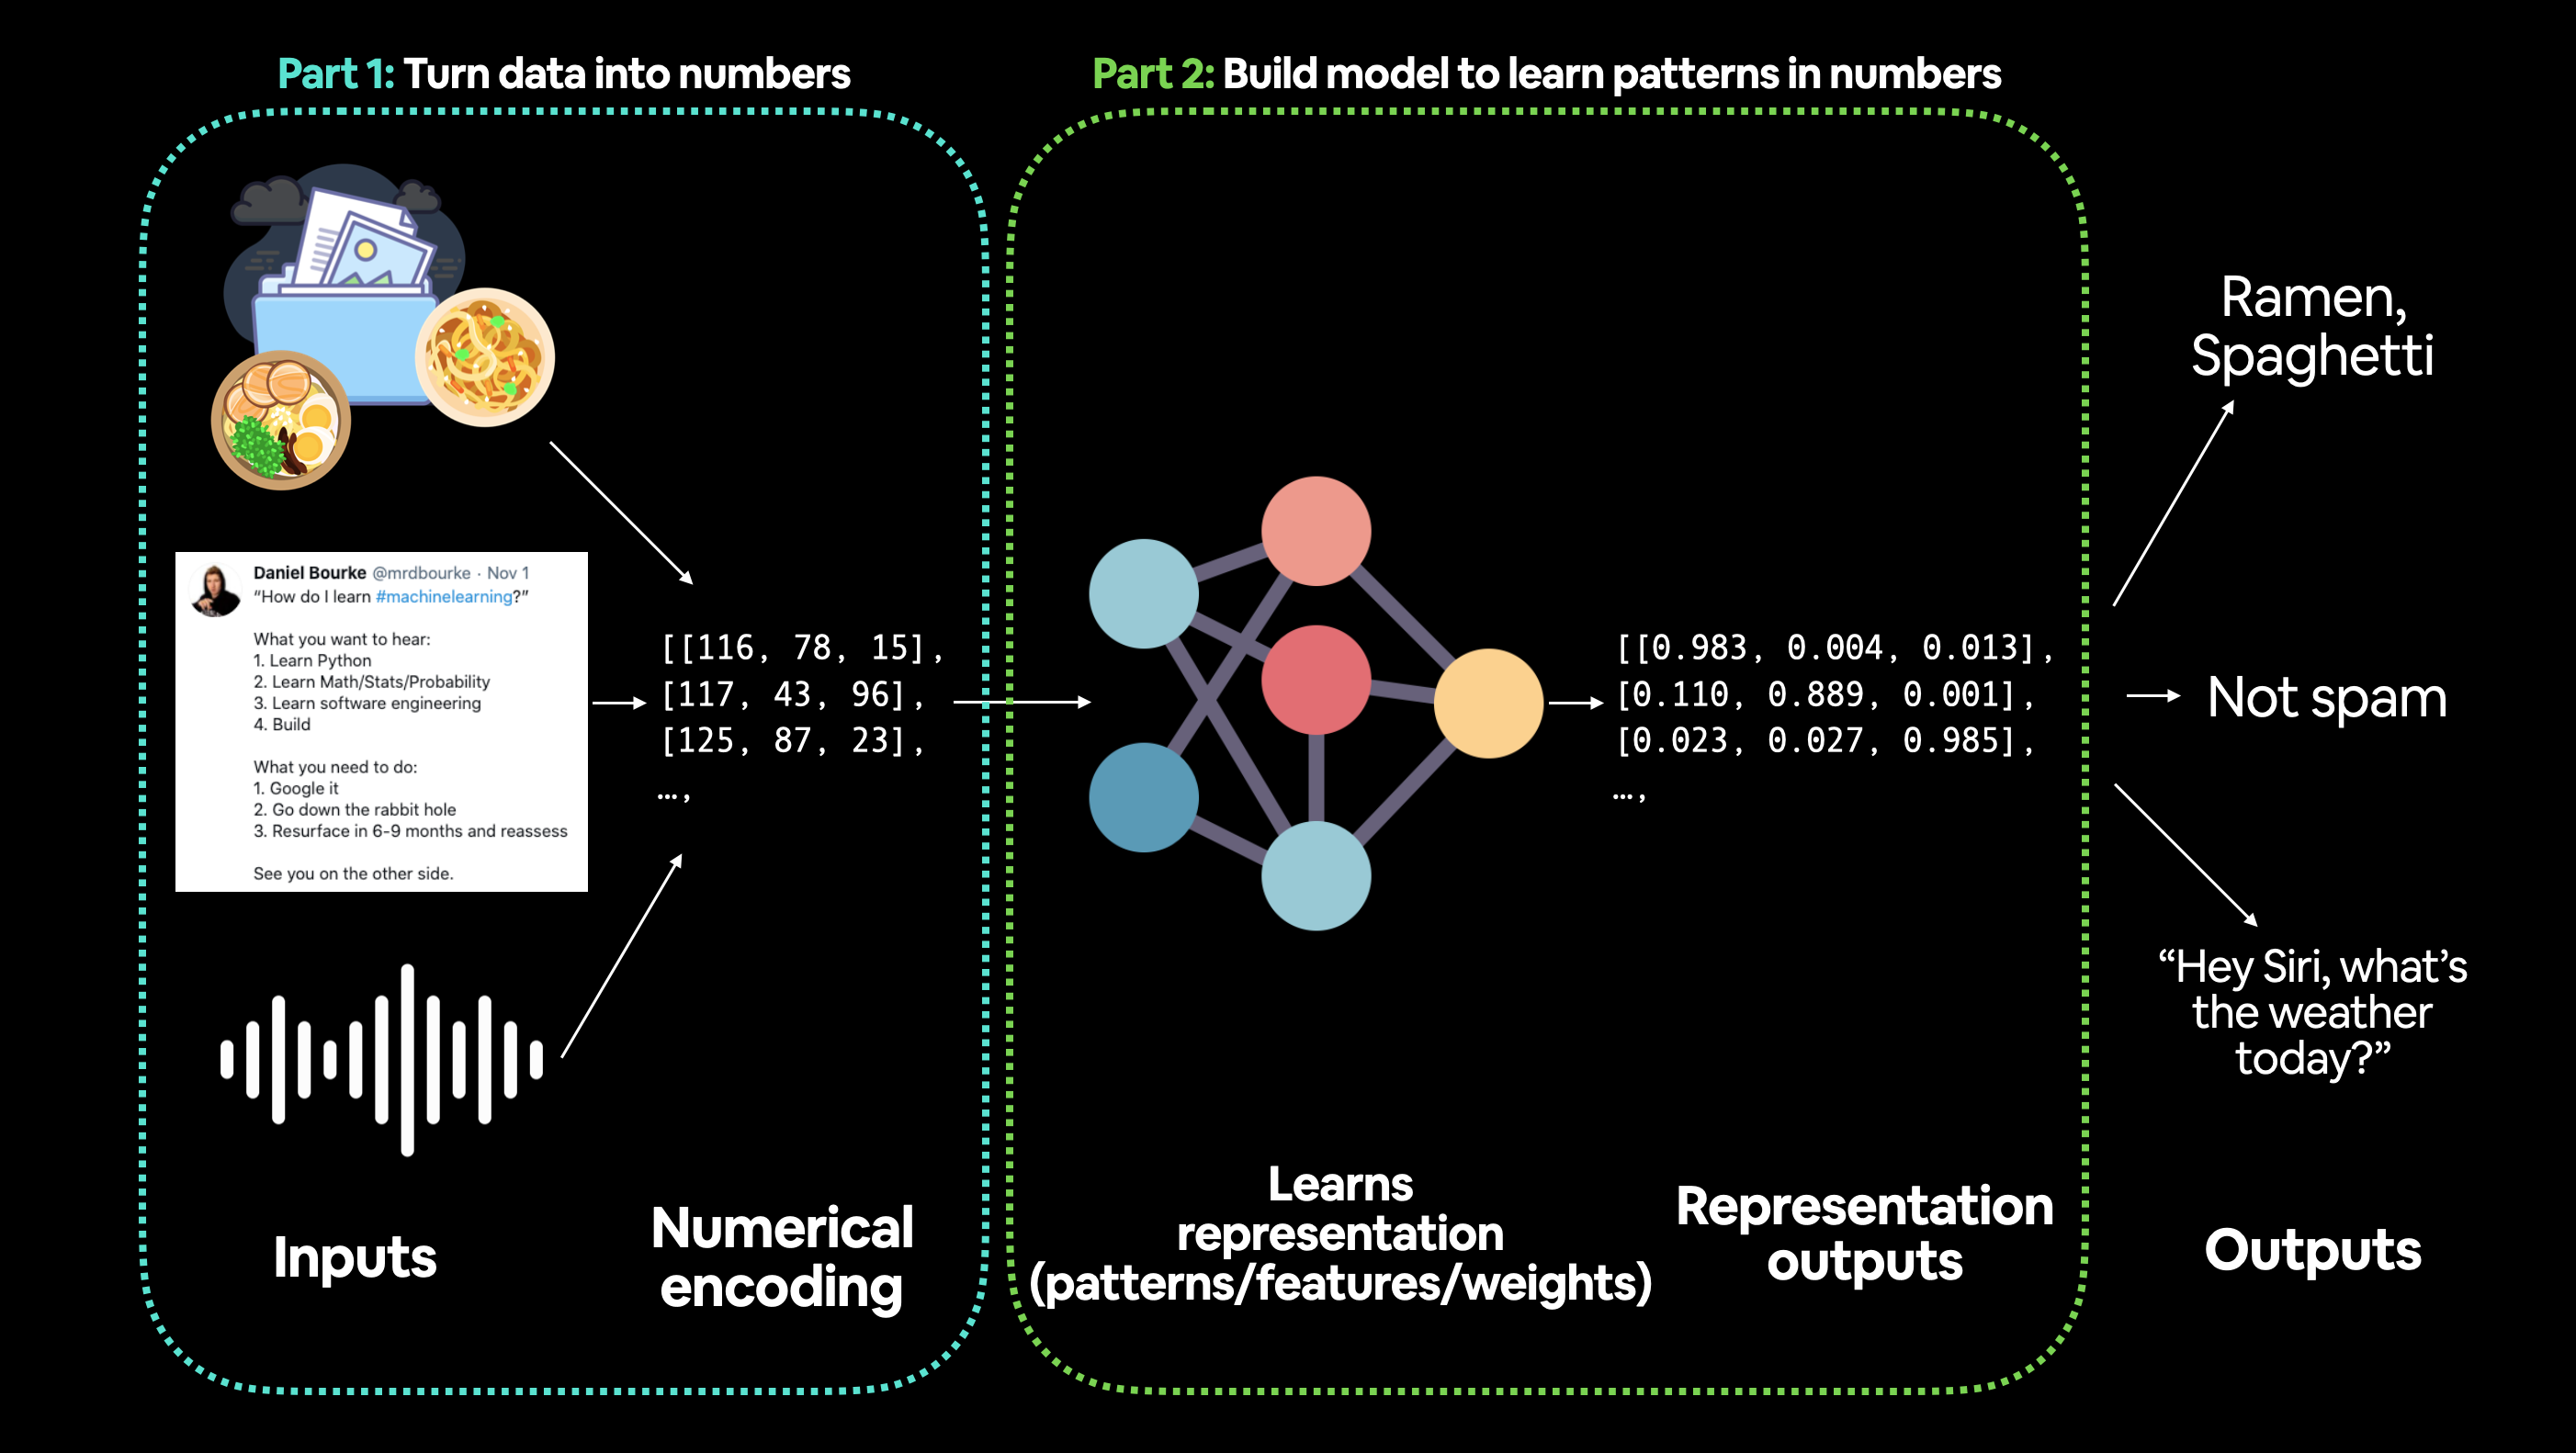


In [321]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

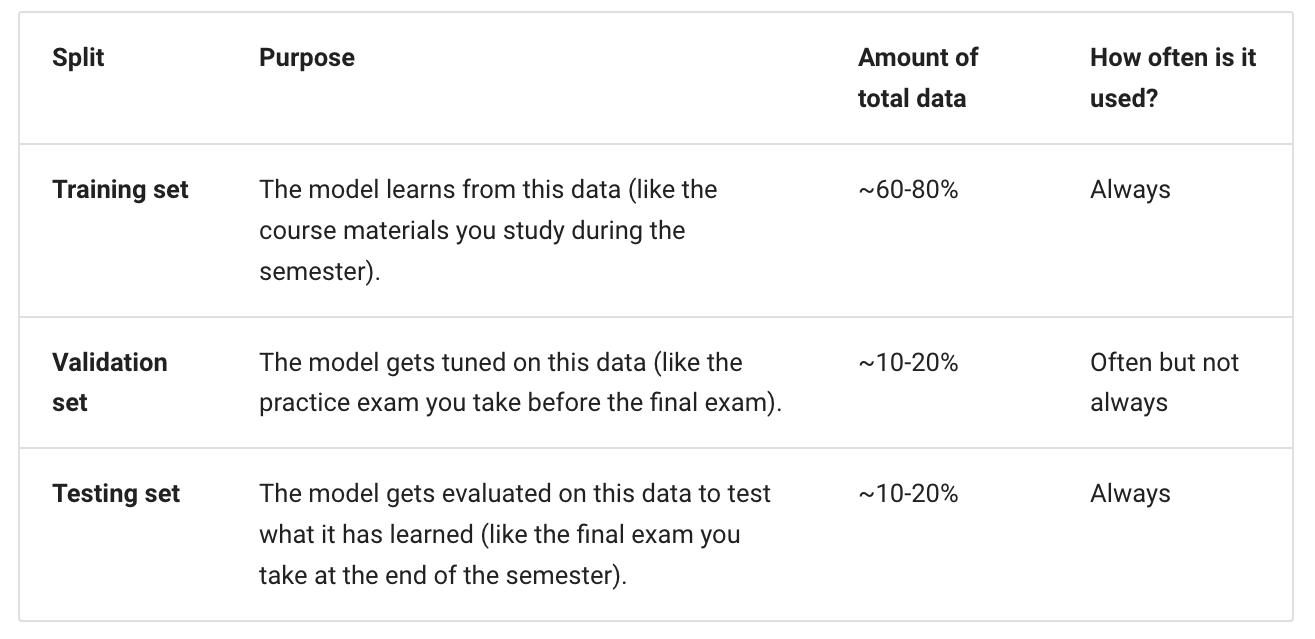


In [322]:
# Create train/test split
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [323]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

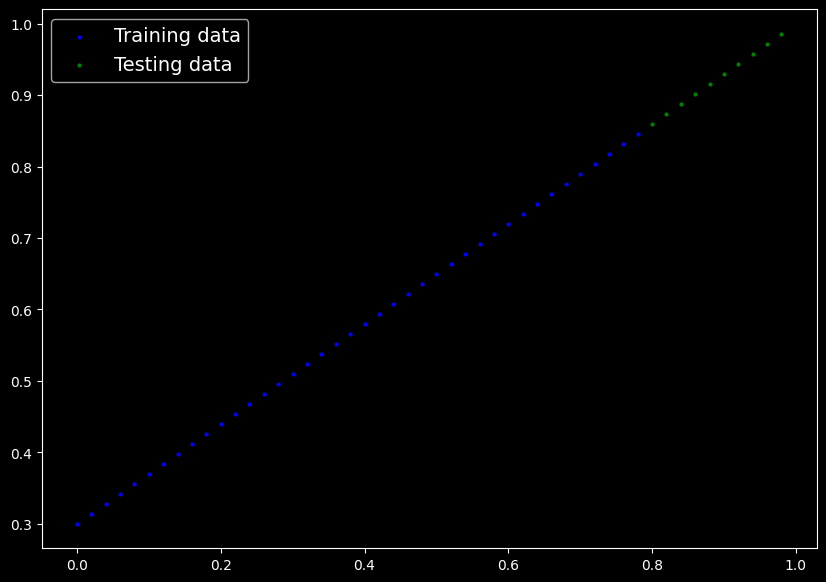

In [324]:
plot_predictions()

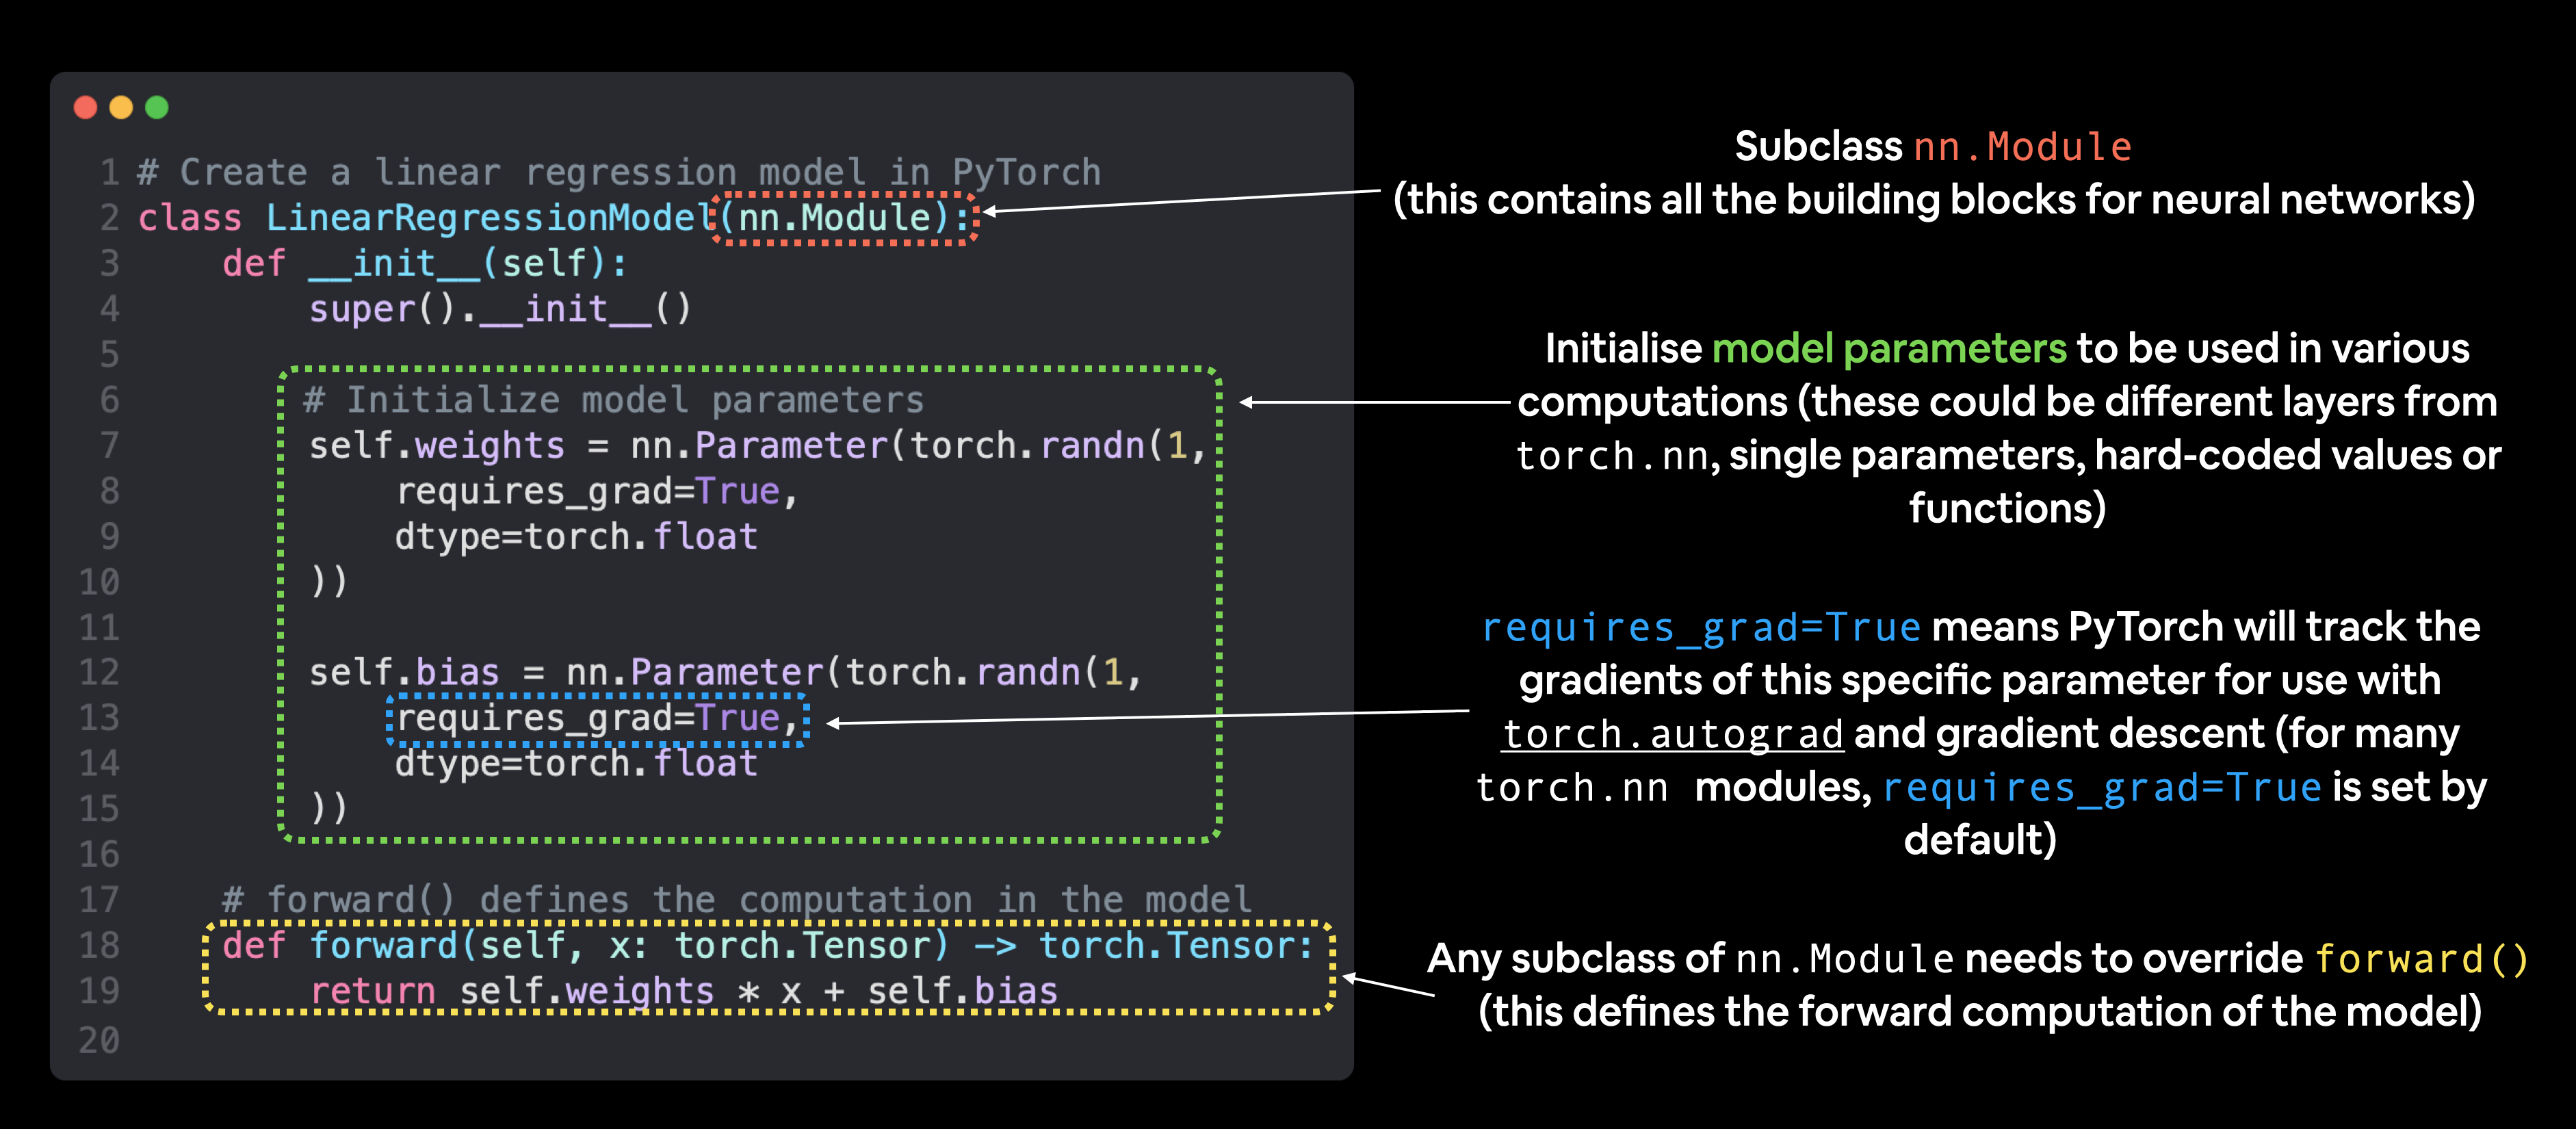


In [325]:
# Create a Linear Regression model class
class LinearRegressionModel(
    nn.Module
):  # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                1,  # <- start with random weights (this will get adjusted as the model learns)
                dtype=torch.float,
            ),  # <- PyTorch loves float32 by default
            requires_grad=True,
        )  # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(
            torch.randn(
                1,  # <- start with random bias (this will get adjusted as the model learns)
                dtype=torch.float,
            ),  # <- PyTorch loves float32 by default
            requires_grad=True,
        )  # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(
        self, x: torch.Tensor
    ) -> torch.Tensor:  # <- "x" is the input data (e.g. training/testing features)
        return (
            self.weights * x + self.bias
        )  # <- this is the linear regression formula (y = m*x + b)

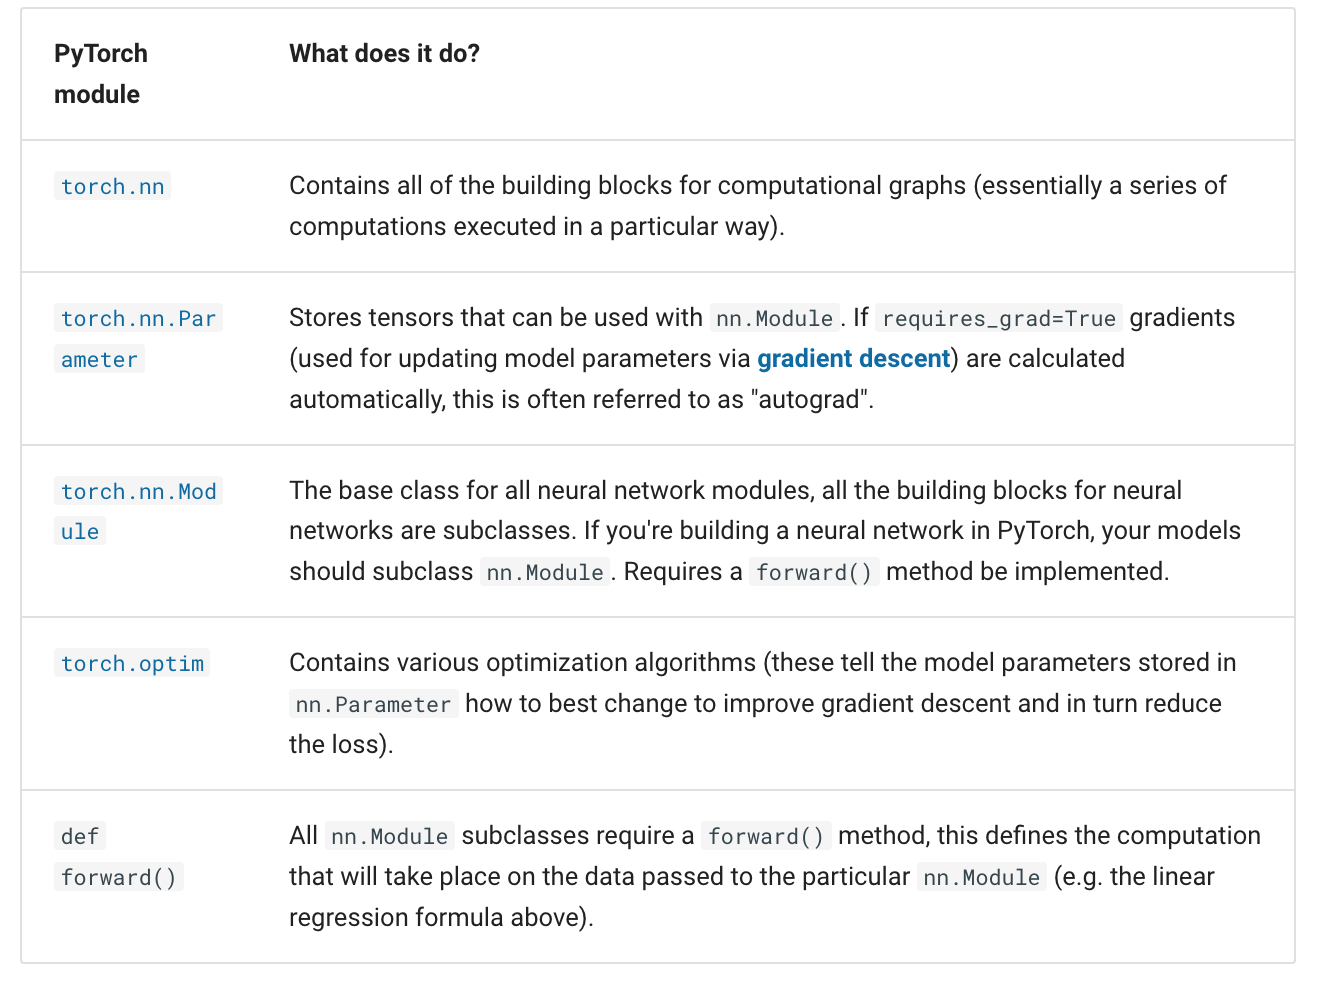


In [326]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [327]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [328]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [329]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


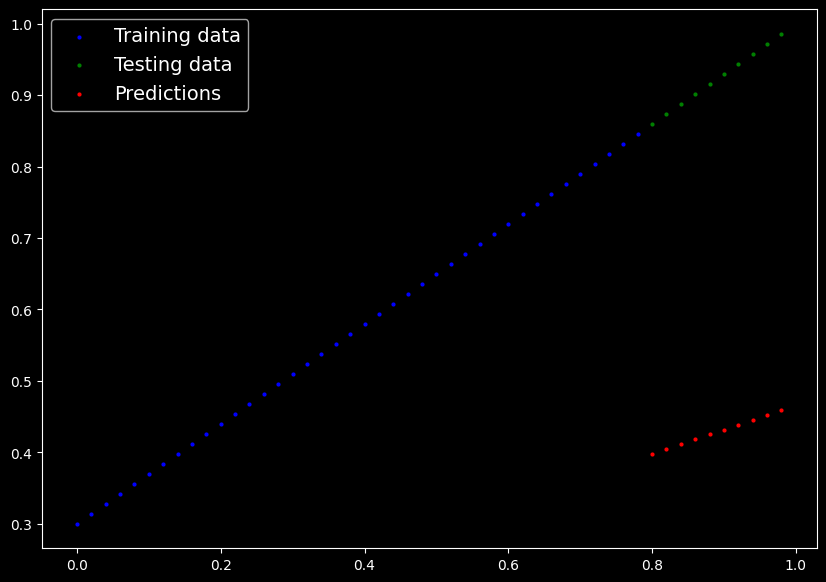

In [330]:
plot_predictions(predictions=y_preds)

In [331]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

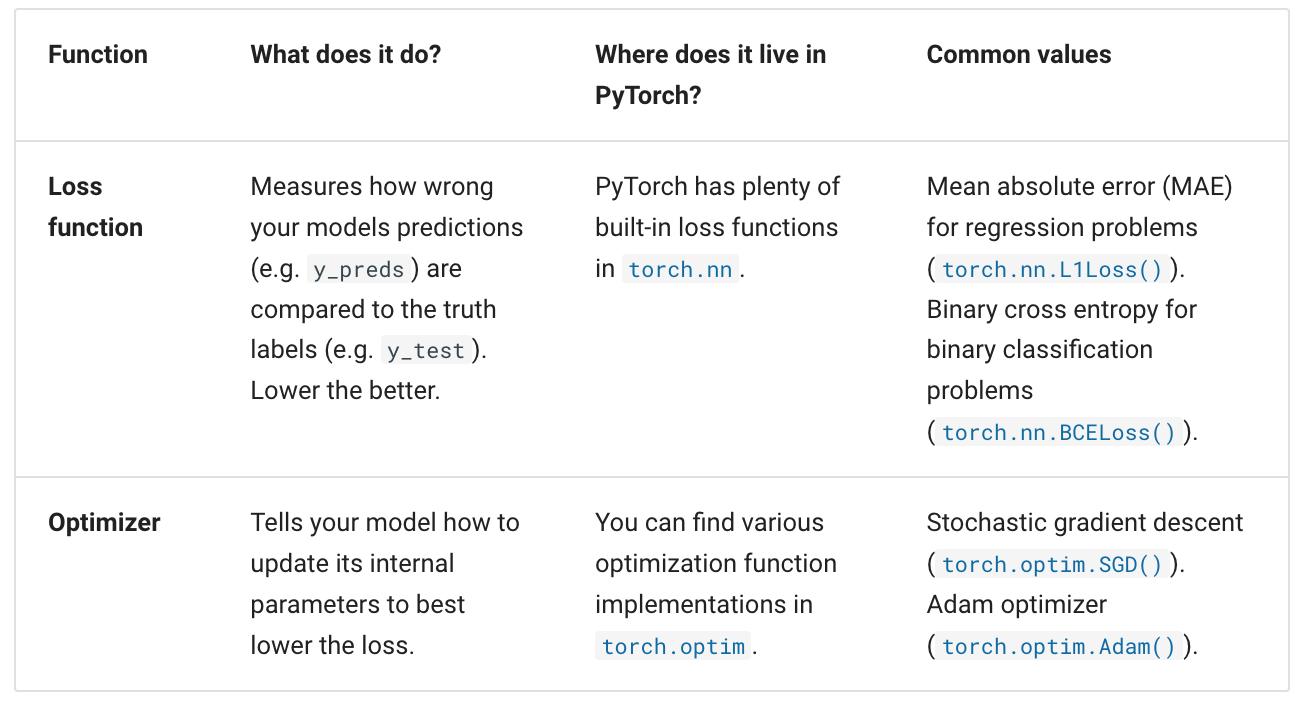


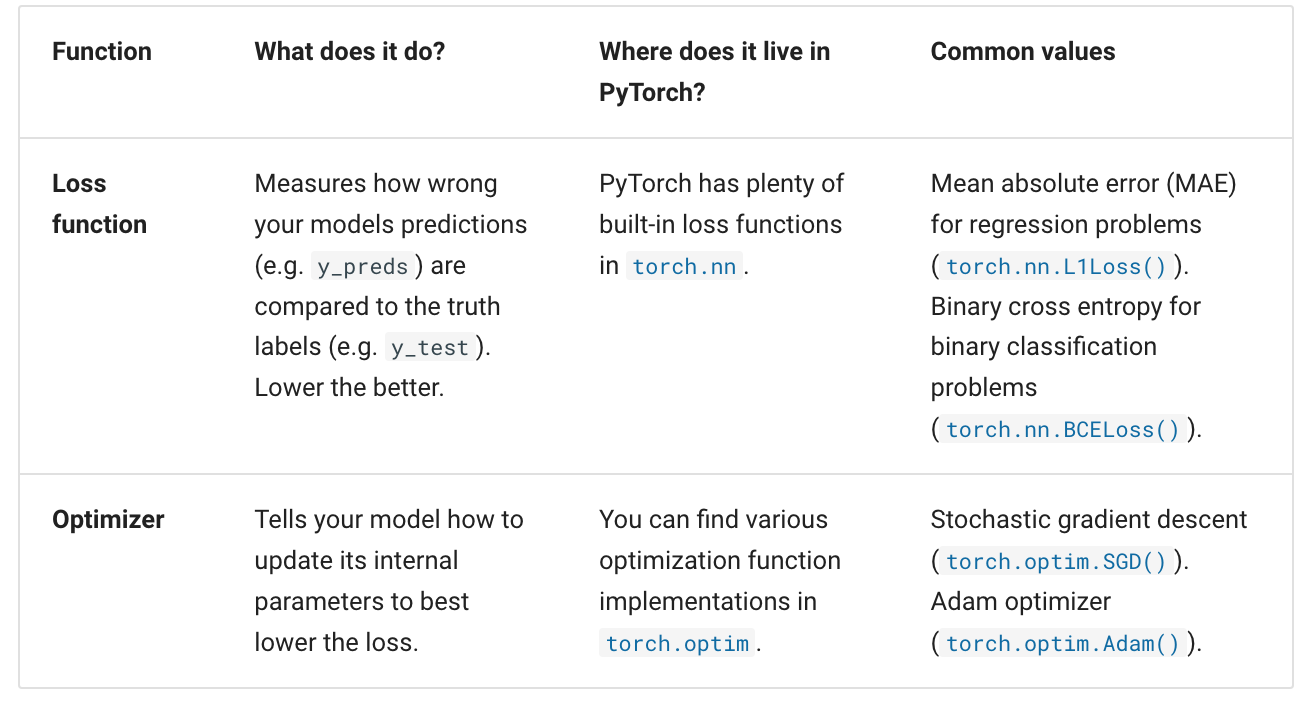


In [332]:
# Create the loss function
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model_0.parameters(), lr=0.1  # parameters of target model to optimize
)  # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

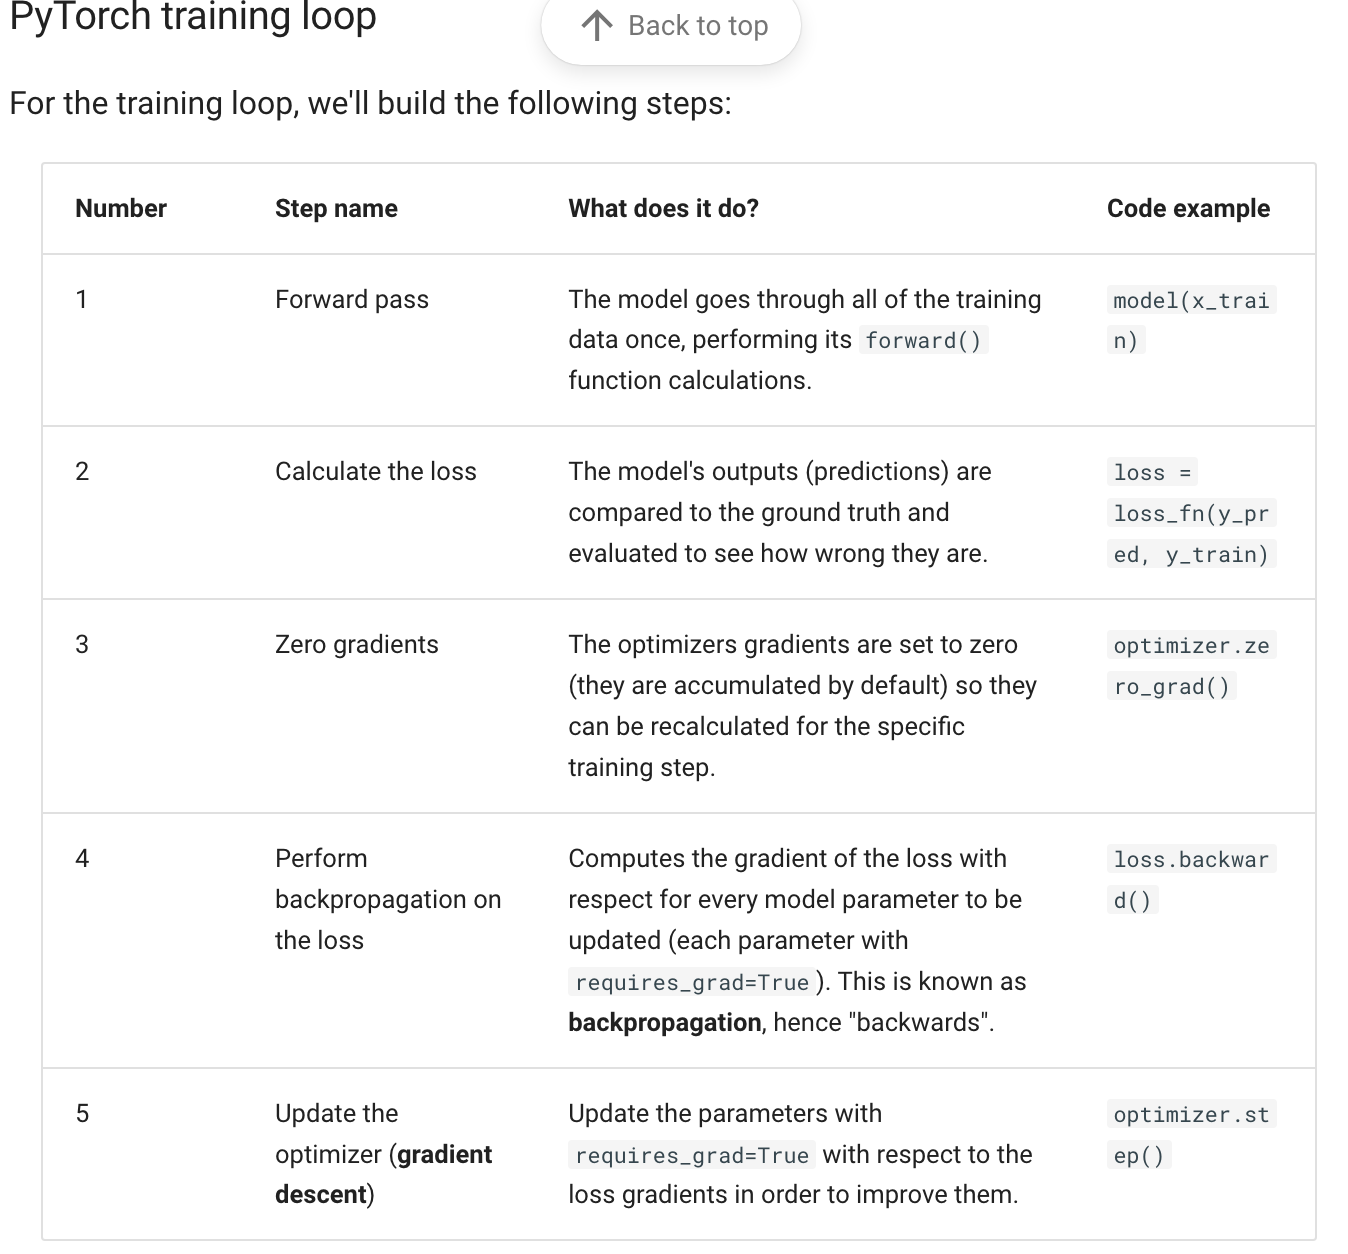


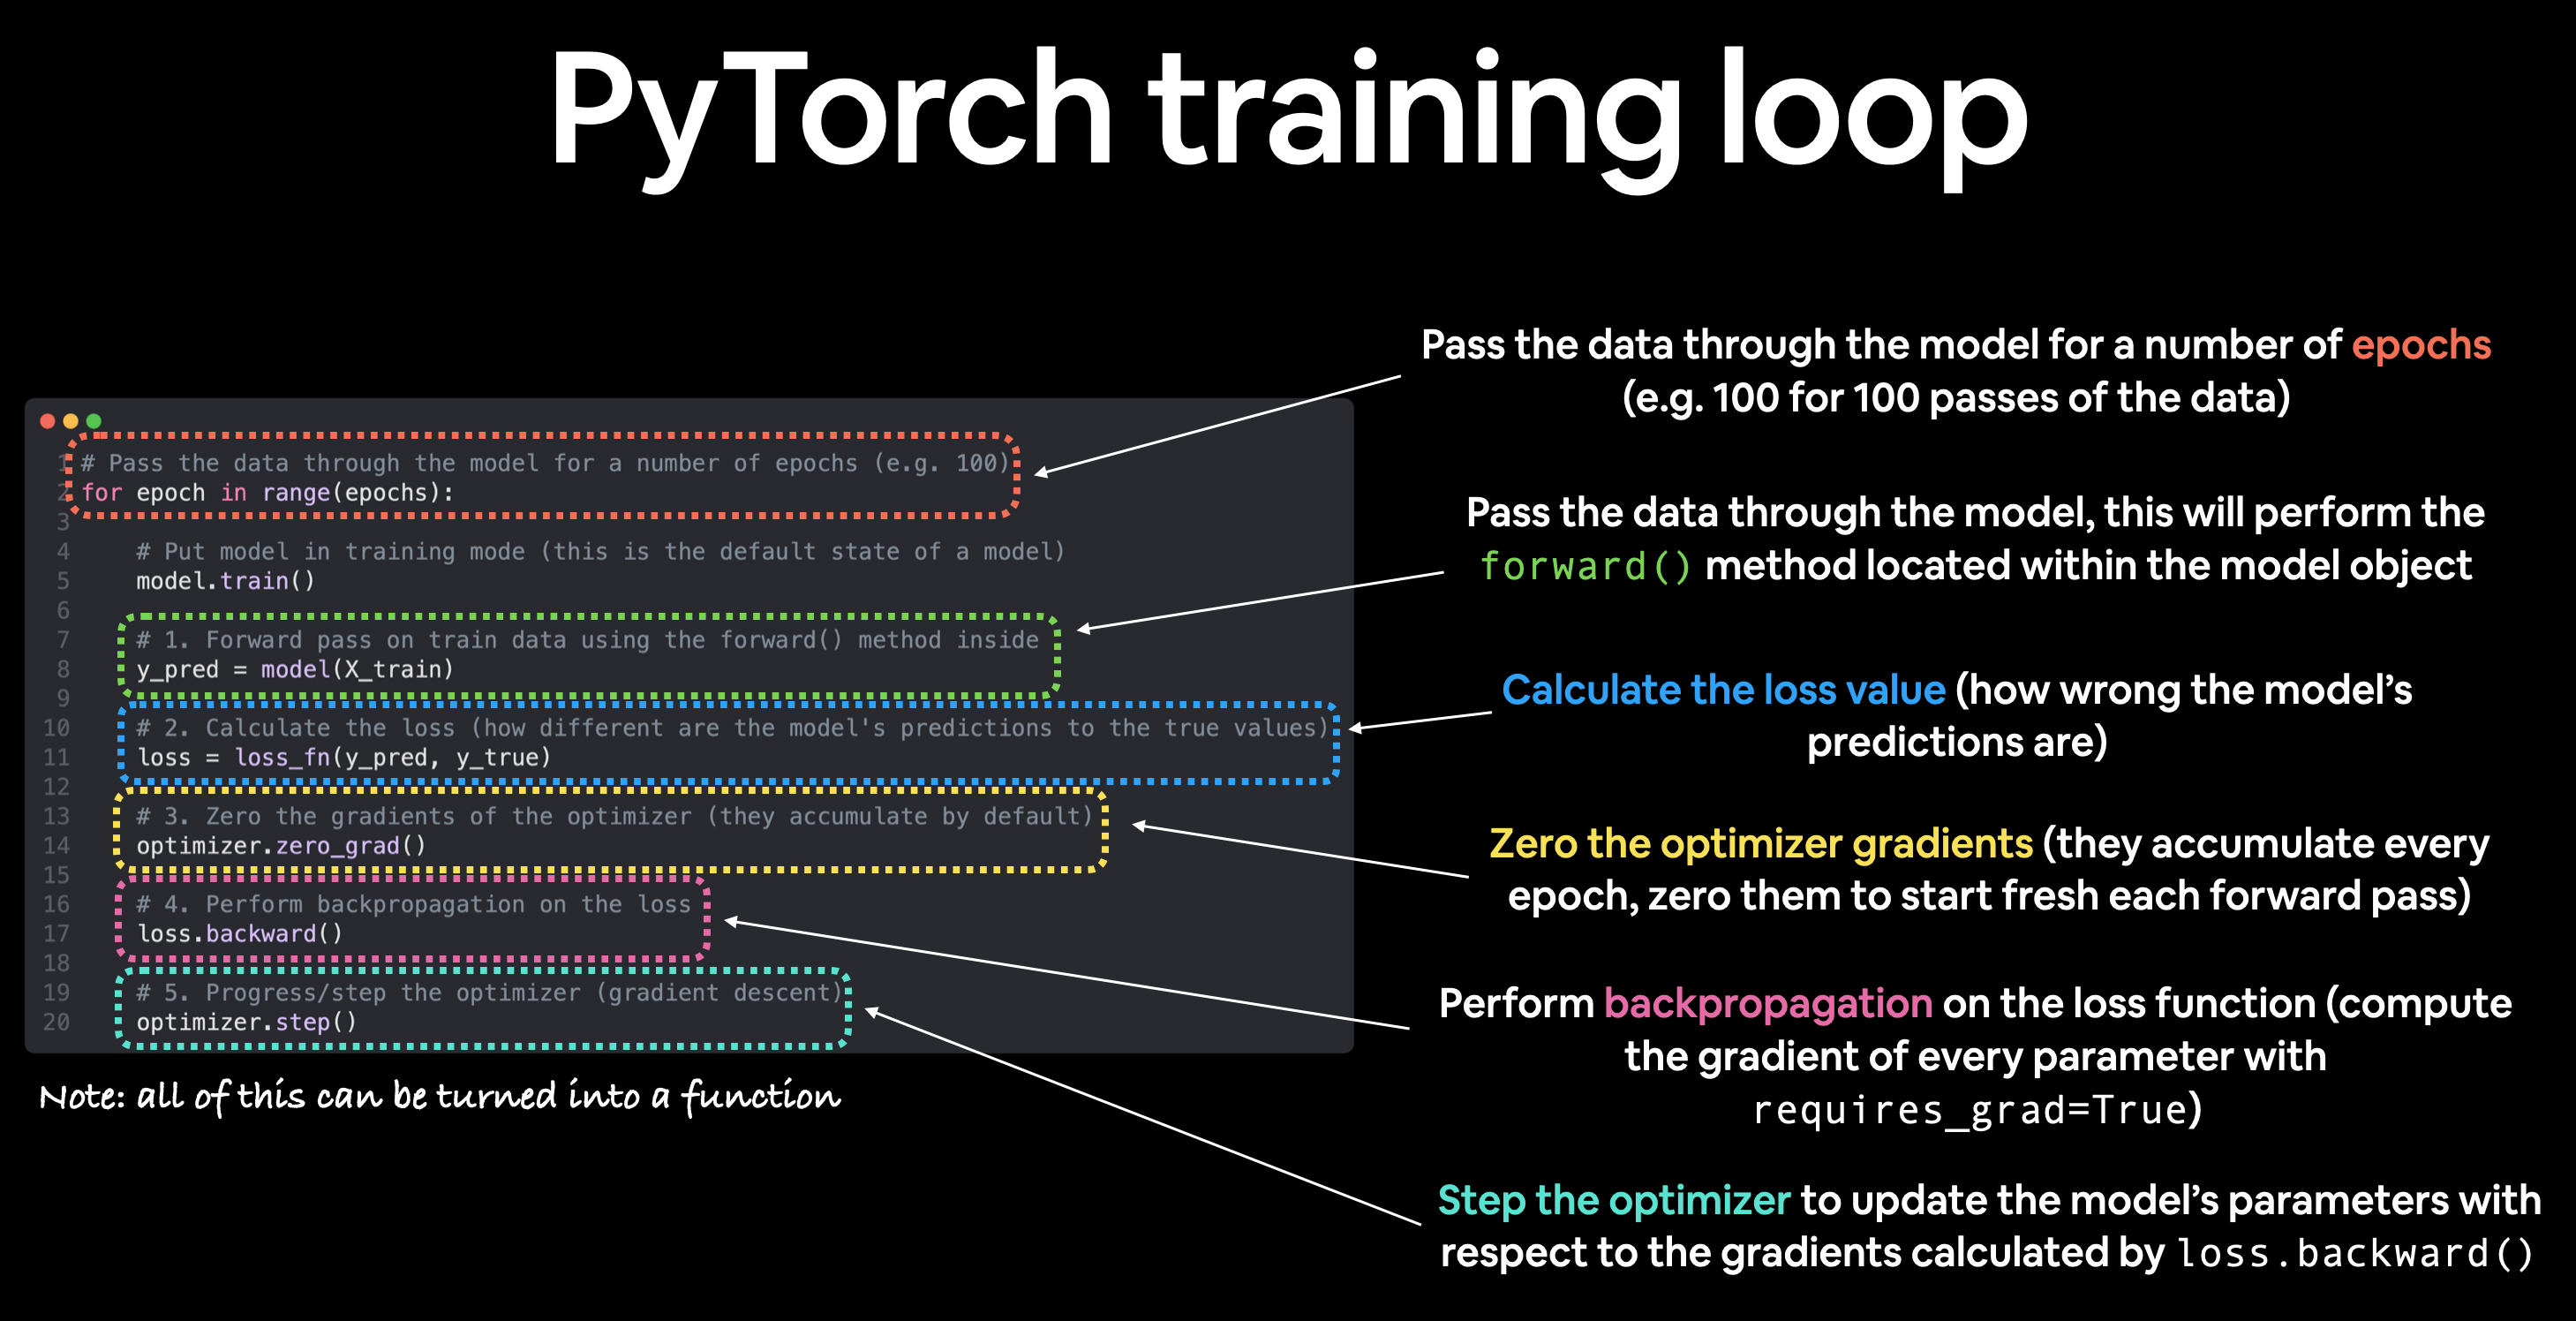


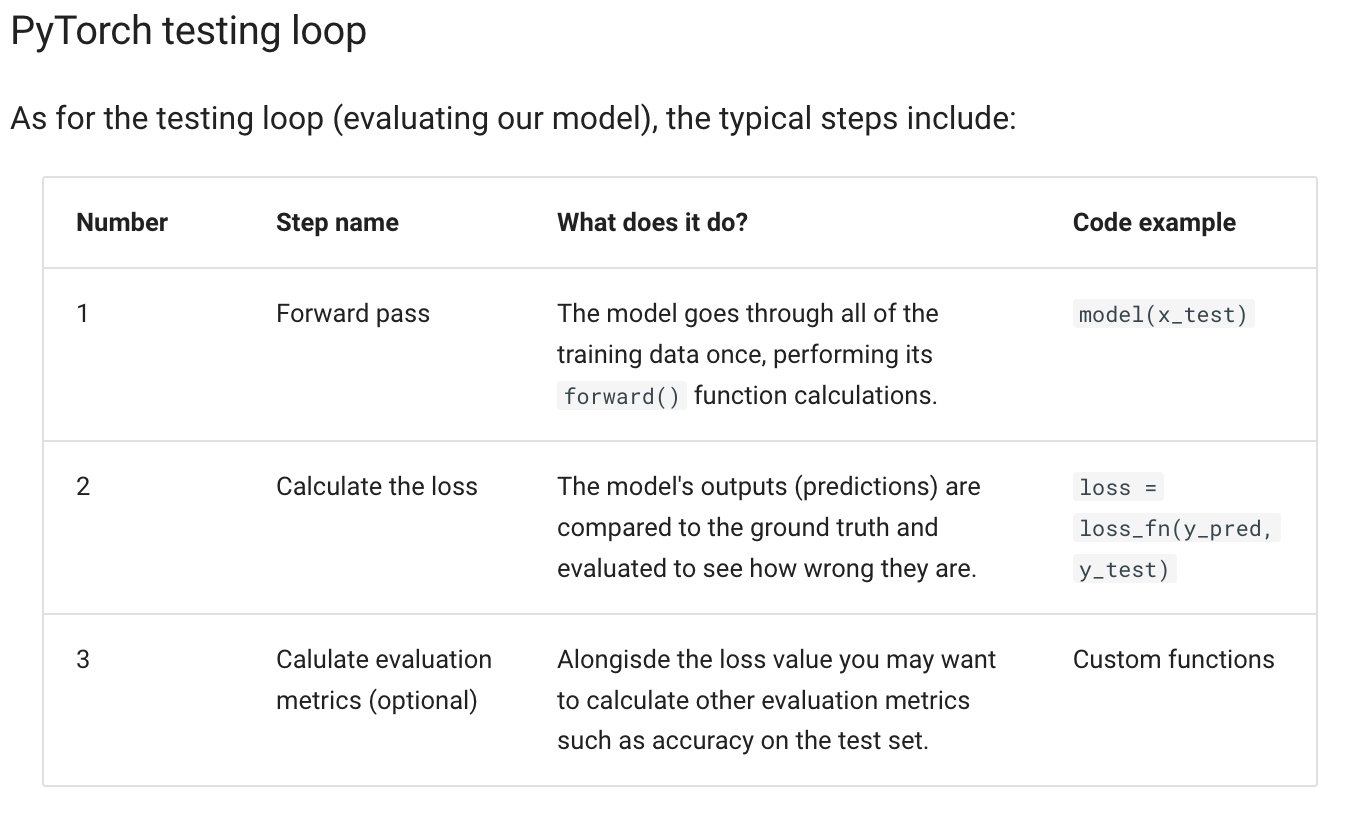


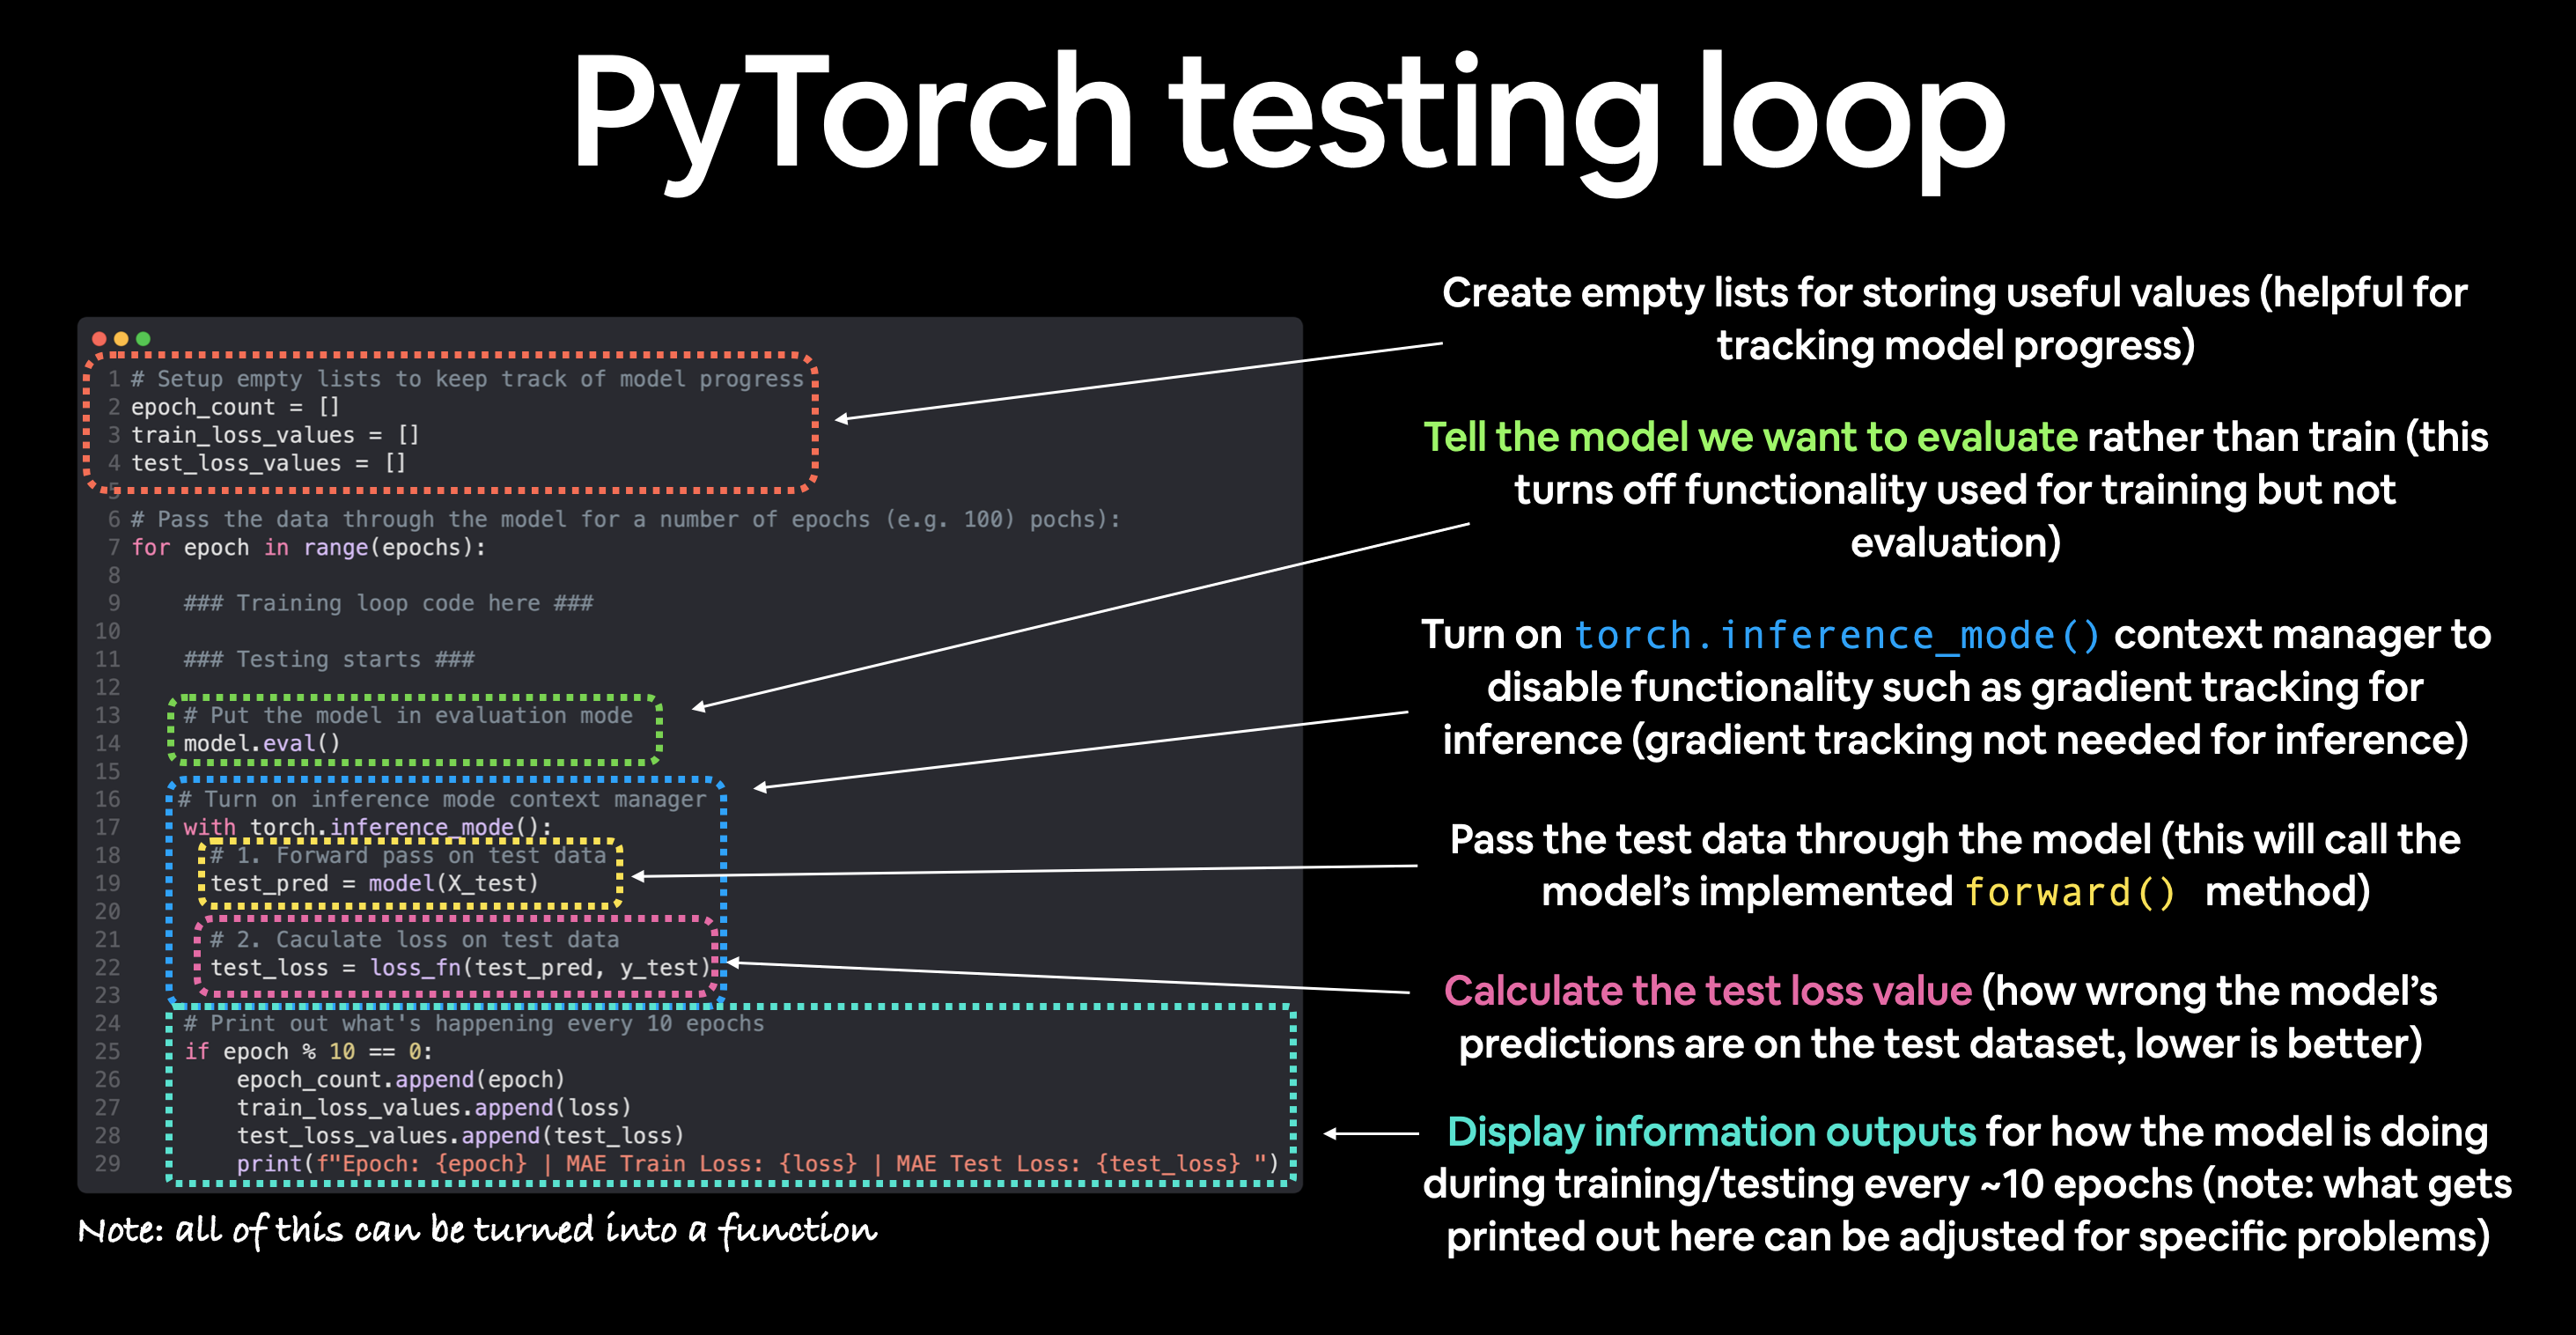


In [333]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(
            test_pred, y_test.type(torch.float)
        )  # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(
                f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} "
            )

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.35982614755630493 
Epoch: 10 | MAE Train Loss: 0.025432366877794266 | MAE Test Loss: 0.05427704378962517 
Epoch: 20 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 30 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 40 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 50 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 60 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 70 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 80 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 90 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 100 | MAE Train Loss: 0.039773717522621155 | MAE Test Loss: 0.11934101581573486 
Epoch: 110 | MAE Train Loss: 0.0397737175226

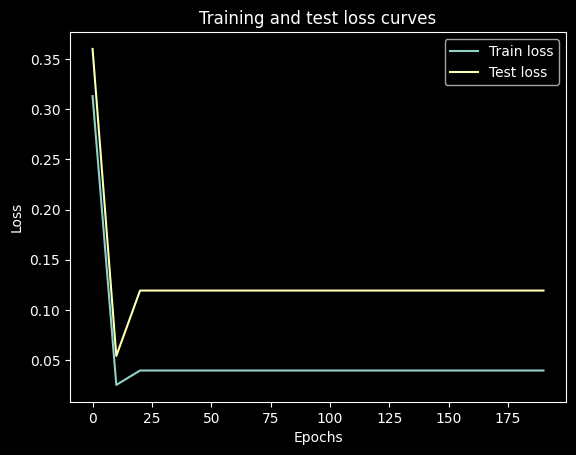

In [334]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [335]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [336]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    # 3. Make sure the calculations are done with the model and data on the same device
    # in our case, we haven't setup device-agnostic code yet so our data and model are
    # on the CPU by default.
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)
y_preds

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]])

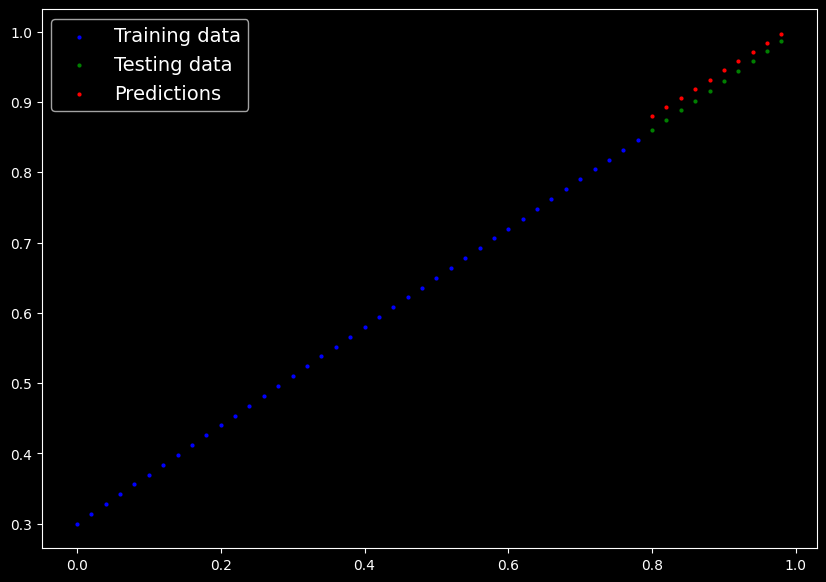

In [337]:
plot_predictions(predictions=y_preds)

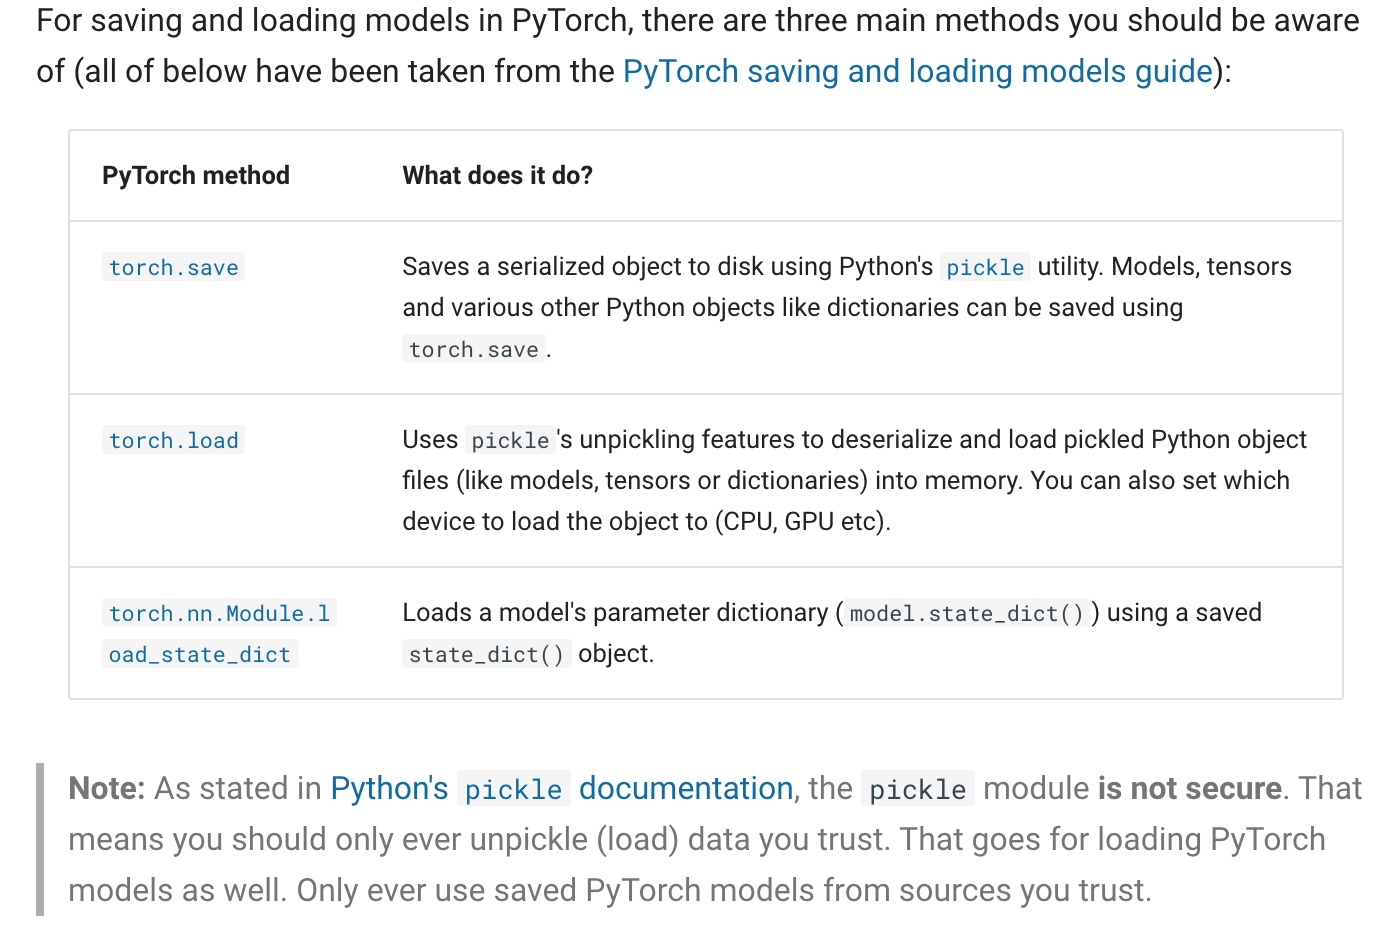
